In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_excel("HousePricePrediction.xlsx")
# printing first 5 records of dataset
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [3]:
dataset.shape


(2919, 13)

In [5]:
# data preprocessing

In [7]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("categorical variables:",len(object_cols))


categorical variables: 4


In [13]:
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

Integer variables: 0


In [15]:
f1 = (dataset.dtypes == 'float')
f1_cols = list(f1[f1].index)
print("Float variables",len(f1_cols))

Float variables 3


In [17]:
# exploratory data analysis

<Axes: >

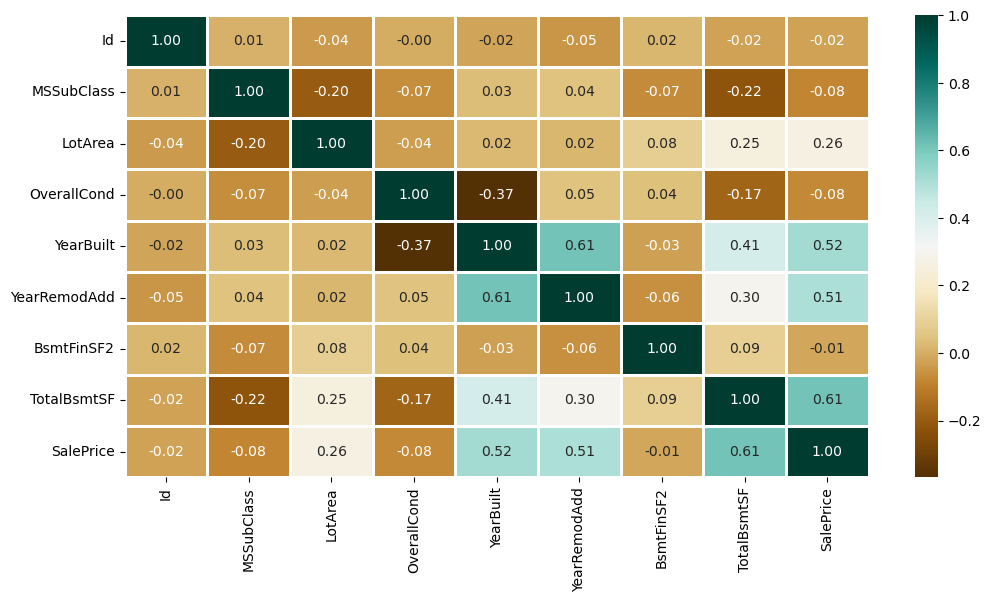

In [21]:
numerical_dataset = dataset.select_dtypes(include=['number'])
plt.figure(figsize=(12,6))
sns.heatmap(numerical_dataset.corr(),
           cmap = 'BrBG',
           fmt = '.2f',
           linewidth = 2,
           annot = True)

In [23]:
#draw a bar plot according to no of unique values of categorical features

<Axes: title={'center': 'No unique values of categorical features'}>

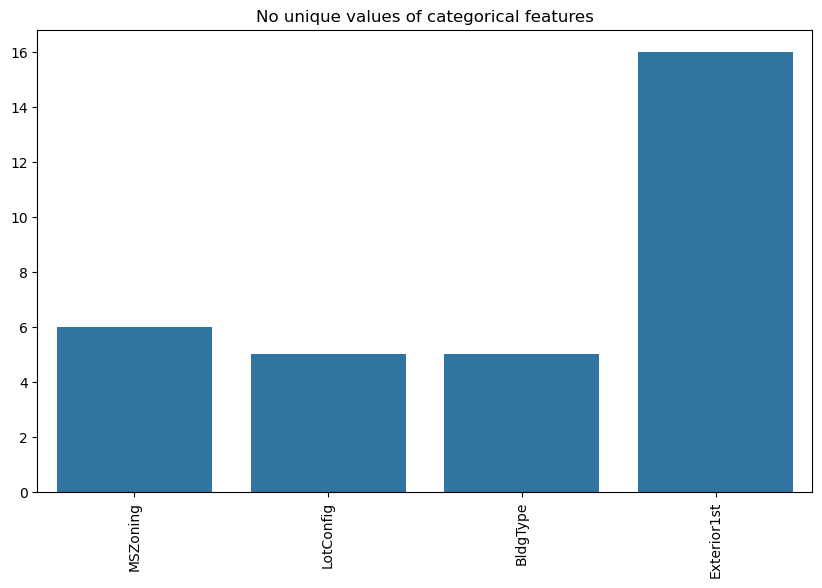

In [27]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No unique values of categorical features')
plt.xticks(rotation = 90)
sns.barplot(x=object_cols,y=unique_values)

In [29]:
#6 unique categories

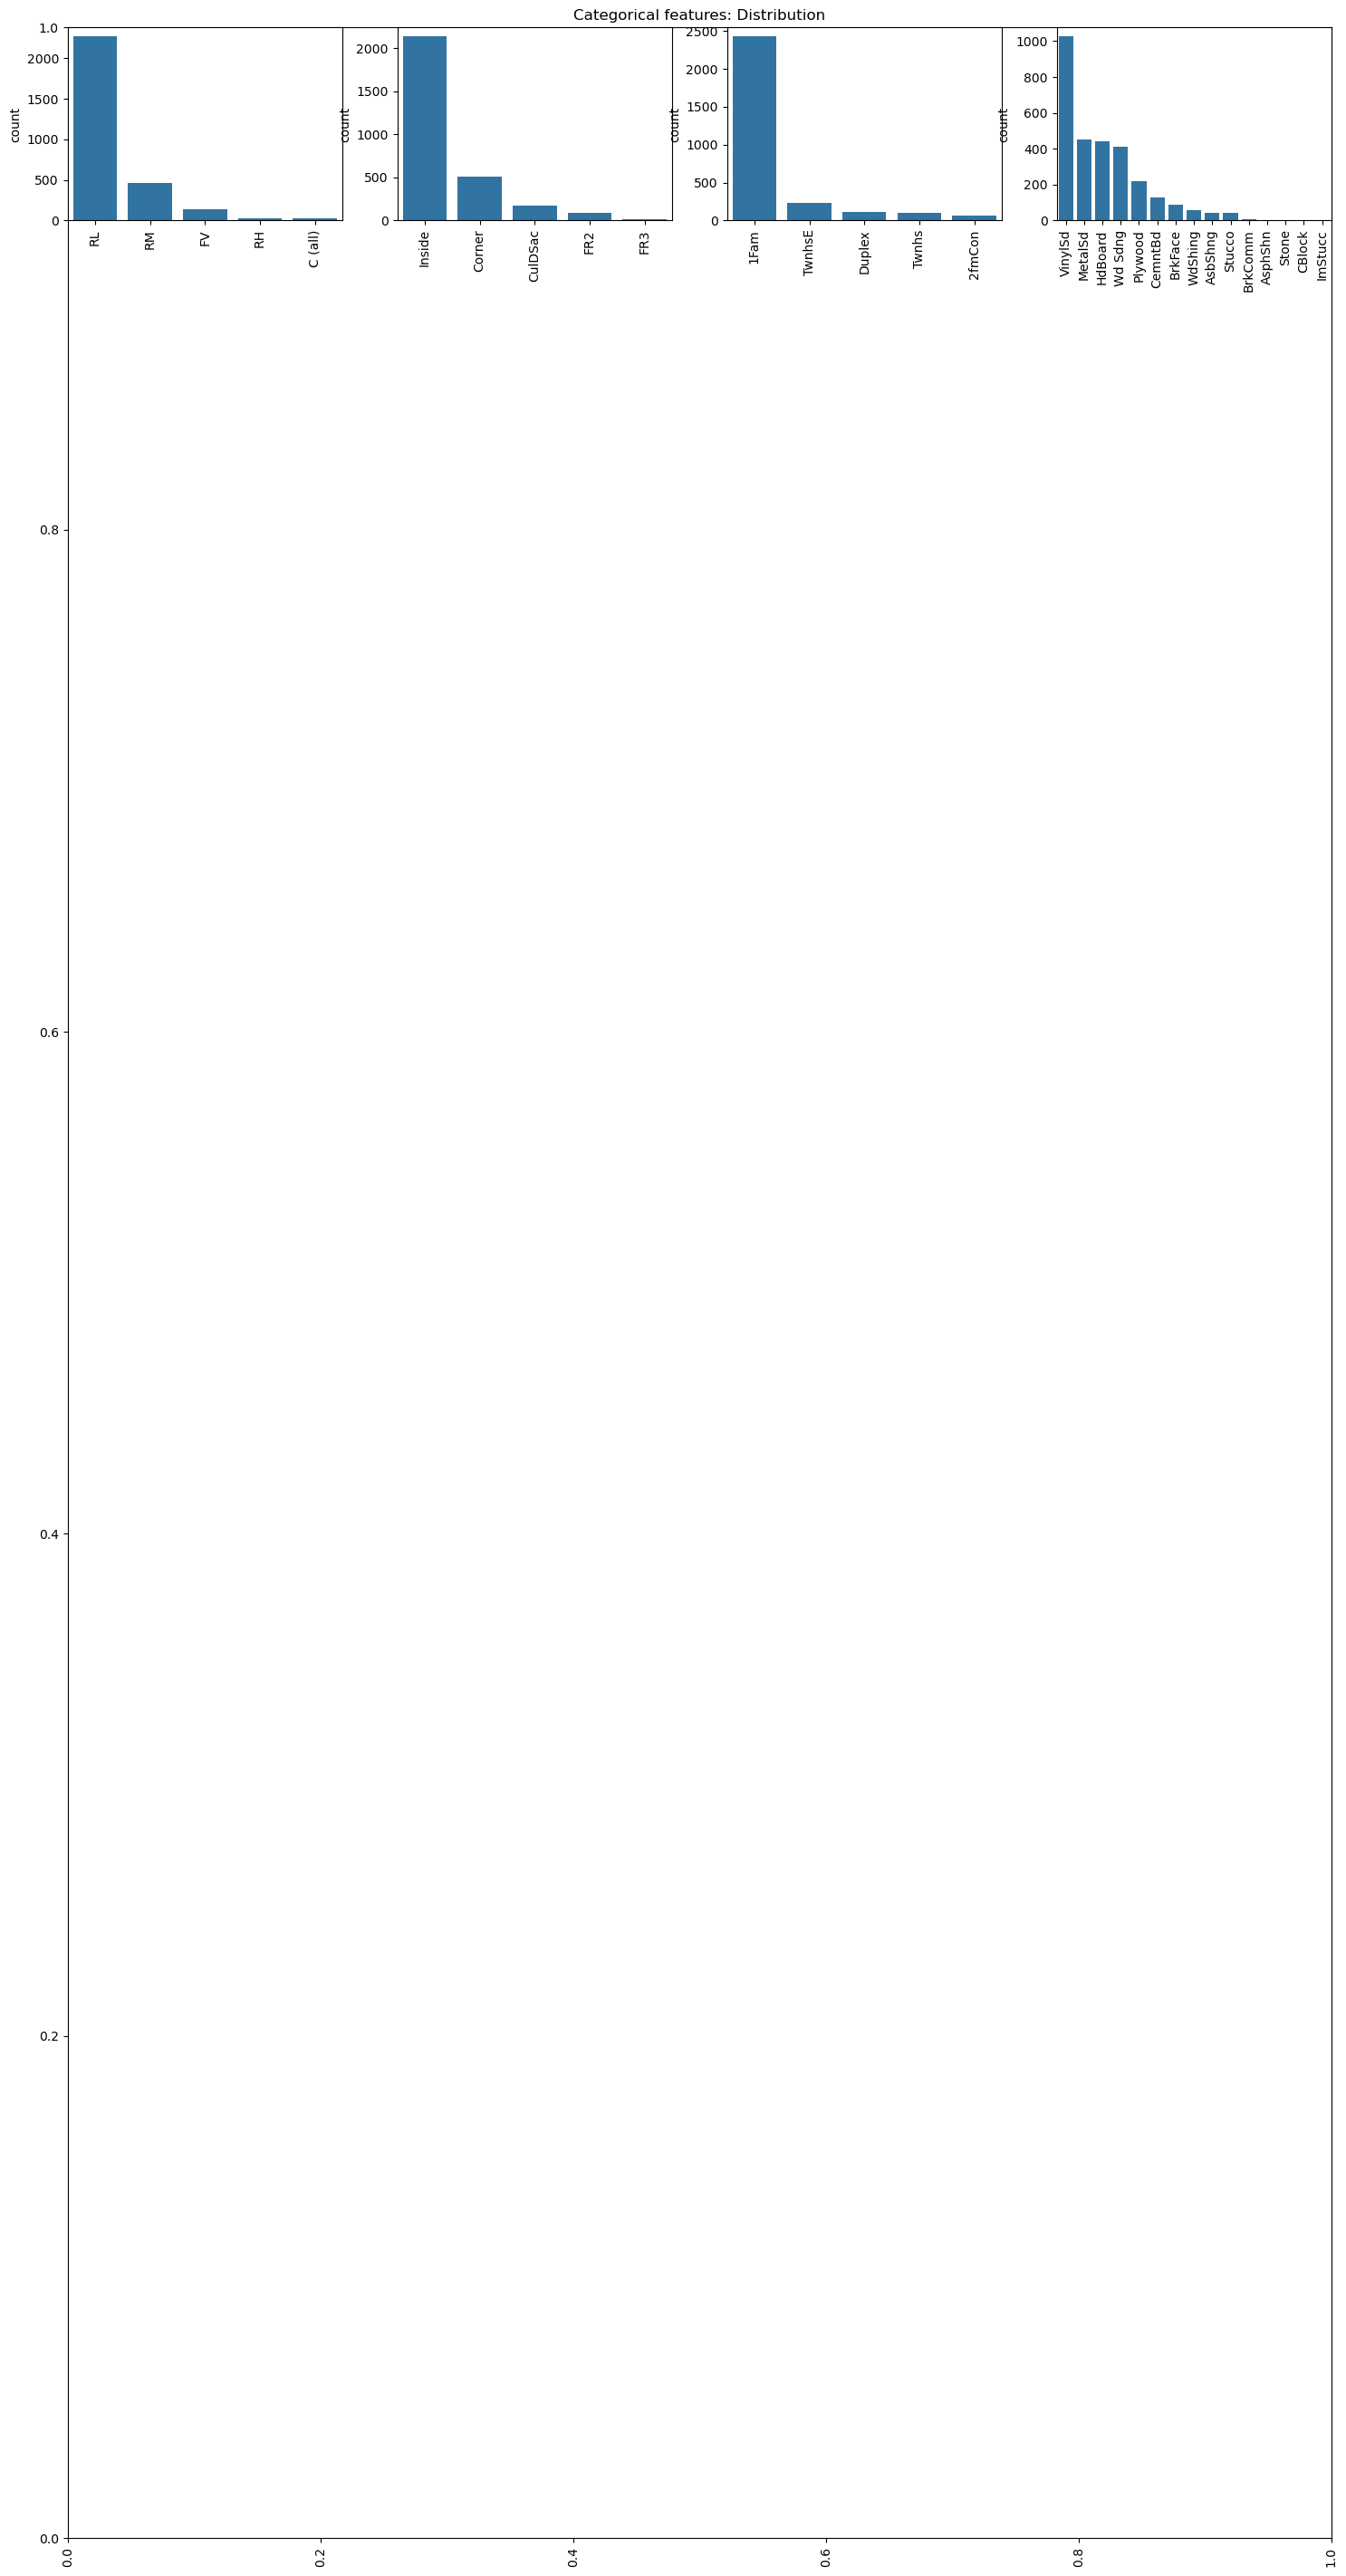

In [33]:
plt.figure(figsize=(18, 36))
plt.title('Categorical features: Distribution')
plt.xticks(rotation = 90)
index = 1

for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation = 90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

In [35]:
# data cleaning

In [37]:
dataset.drop(['Id'],
            axis = 1,
            inplace = True)

In [39]:
# replacing sale price empty values with their mean values to make the data distribution symmetric


In [41]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
    dataset['SalePrice'].mean()
)

In [43]:
#Drop records with null values(as the empty records are very less)

In [45]:
new_dataset = dataset.dropna()

In [47]:
# checking features which have null values in the new dataframe 

In [49]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [51]:
# OneHotEncoader-for label categorical features

In [58]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [ ]:
#Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.

In [64]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)



In [66]:
# splitting dataset into training and testing

In [70]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [74]:
#model and accuracy


In [76]:
#svm

In [78]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.1870512931870423


In [80]:
# Random forest regression

In [82]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.19305172712388546

In [84]:
# linear regression

In [88]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.18741683841599951


In [96]:
#CatBoost Classifier
!pip install catboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.7 MB 2.0 MB/s eta 0:00:52
   ---------------------------------------- 0.3/101.7 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 0.3/101.7 MB 2.5 MB/s eta 0:00:42
   ---------------------------------------- 0.3/101.7 MB 2.3 MB/s eta 0:00:46
   ---------------------------------------- 0.5/101.7 MB 2.0 MB/s eta 0:00:51
   ---------------------------------------- 0.6/101.7 MB 2.0 MB/s eta 0:00:52
   ---------------------------------------- 0.6/101.7 MB 2.0 MB/s eta 0:00:52
   ---------------------------------------- 0.6/101.7 MB 1.8 MB/s eta 0:00:58
   ---------------------------------------- 0.7/101.7 MB 1.8 MB/s eta 0:00:58
   ---------------------------------------- 0.8/101.7 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 0.8/101.7 MB 1.7 MB/s eta 0:01:01


In [98]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid) 

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score



Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 5.5ms	remaining: 5.49s
1:	learn: 55780.1567575	total: 11.8ms	remaining: 5.89s
2:	learn: 55060.9599505	total: 18.7ms	remaining: 6.21s
3:	learn: 54456.1126921	total: 25ms	remaining: 6.24s
4:	learn: 53901.1464265	total: 31.1ms	remaining: 6.19s
5:	learn: 53334.6062357	total: 37ms	remaining: 6.13s
6:	learn: 52824.4943646	total: 42.8ms	remaining: 6.07s
7:	learn: 52381.4267520	total: 48.2ms	remaining: 5.98s
8:	learn: 51841.0364316	total: 54.3ms	remaining: 5.97s
9:	learn: 51281.5852560	total: 61.2ms	remaining: 6.06s
10:	learn: 50825.3817438	total: 68.3ms	remaining: 6.14s
11:	learn: 50477.2609796	total: 74.4ms	remaining: 6.12s
12:	learn: 50081.4097641	total: 80.7ms	remaining: 6.13s
13:	learn: 49663.6380360	total: 86.7ms	remaining: 6.11s
14:	learn: 49334.5782662	total: 92.6ms	remaining: 6.08s
15:	learn: 48967.5221026	total: 98.4ms	remaining: 6.05s
16:	learn: 48676.4063222	total: 103ms	remaining: 5.97s
17:	learn: 48359.1169955	total: 10

0.38351169878113034

In [101]:
!mkdir HousePricePrediction


In [103]:
%cd HousePricePrediction


C:\Users\rajas\HousePricePrediction


In [105]:
!git init


Initialized empty Git repository in C:/Users/rajas/HousePricePrediction/.git/


In [107]:
!git add .


In [109]:
!git commit -m "Initial commit"


On branch master

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [115]:
!git remote add origin https://github.com/rajasdholam20/HousePricePrediction.git


error: remote origin already exists.


In [117]:
!git push -u origin master


error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/rajasdholam20/HousePricePrediction.git'


In [119]:
!git branch -M main
